In [1]:
# 多层嵌套
[m+'_'+n for m in ['a', 'b'] for n in ['c', 'd']]

['a_c', 'a_d', 'b_c', 'b_d']

In [2]:
# 截断列表中超过5的元素，即超过5的用5代替，小于5的保留原来的值：
L = [1, 2, 3, 4, 5, 6, 7]
[i if i<=5 else 5 for i in L]

[1, 2, 3, 4, 5, 5, 5]

**匿名函数与map方法**

In [ ]:
[(lambda x: 2*x)(i) for i in range(5)]
list(map(lambda x: 2*x, range(5)))

In [3]:
# 对于多个输入值的函数映射，可以通过追加迭代对象实现
list(map(lambda x, y: str(x)+'_'+y, range(5), list('abcde')))

['0_a', '1_b', '2_c', '3_d', '4_e']

**zip对象与enumerate方法**

zip函数能够把多个可迭代对象打包成一个元组构成的可迭代对象

In [4]:
L1, L2, L3 = list('abc'), list('def'), list('hij')
list(zip(L1, L2, L3))

[('a', 'd', 'h'), ('b', 'e', 'i'), ('c', 'f', 'j')]

In [5]:
for i, j, k in zip(L1, L2, L3):
     print(i, j, k)

a d h
b e i
c f j


enumerate是一种特殊的打包，它可以在迭代时绑定迭代元素的遍历序号：

In [6]:
L = list('abcd')
for index, value in enumerate(L):
     print(index, value)

0 a
1 b
2 c
3 d


用zip对象也能够简单地实现这个功能：

In [7]:
for index, value in zip(range(len(L)), L):
     print(index, value)

0 a
1 b
2 c
3 d


当需要对两个列表建立**字典映射**时，可以利用zip对象：

In [8]:
dict(zip(L1, L2))

{'a': 'd', 'b': 'e', 'c': 'f'}

既然有了压缩函数，那么Python也提供了*操作符和zip联合使用来进行解压操作

In [10]:
zipped = list(zip(L1, L2, L3))
print(zipped)
list(zip(*zipped)) # 三个元组分别对应原来的列表

[('a', 'd', 'h'), ('b', 'e', 'i'), ('c', 'f', 'j')]


[('a', 'b', 'c'), ('d', 'e', 'f'), ('h', 'i', 'j')]

### 二、Numpy基础

数组的构造， 变形与合并，切片与索引 参照 [Numpy](./Numpy.ipynb)

#### 常用函数
【a】where

where是一种条件函数，可以指定满足条件与不满足条件位置对应的填充值：

In [12]:
import numpy as np
a = np.array([-1,1,-1,0])
np.where(a>0, a, 5) # 对应位置为True时填充a对应元素，否则填充5

array([5, 1, 5, 5])

【b】nonzero, argmax, argmin

这三个函数返回的都是索引，nonzero返回非零数的索引，argmax, argmin分别返回最大和最小数的索引：

In [15]:
a = np.array([-2,-5,0,1,3,-1])
print(np.nonzero(a))
print(a.argmax())
print(a.argmin())

(array([0, 1, 3, 4, 5]),)
4
1


【c】any, all

any指当序列至少 存在一个 True或非零元素时返回True，否则返回False

all指当序列元素 全为 True或非零元素时返回True，否则返回False

In [16]:
a = np.array([0,1])
a.any()

True

【d】cumprod, cumsum, diff

cumprod, cumsum分别表示累乘和累加函数，返回同长度的数组，diff表示和前一个元素做差，由于第一个元素为缺失值，因此在默认参数情况下，返回长度是原数组减1

In [18]:
a = np.array([1,2,3])
print(a.cumprod())
print(a.cumsum())
print(np.diff(a))

[1 2 6]
[1 3 6]
[1 1]


【e】 统计函数

常用的统计函数包括max, min, mean, median, std, var, sum, quantile，其中分位数计算是全局方法，因此不能通过array.quantile的方法调用

In [19]:
target = np.arange(5)
target

array([0, 1, 2, 3, 4])

In [20]:
np.quantile(target, 0.5) # 0.5分位数

2.0

但是对于含有缺失值的数组，它们返回的结果也是缺失值，如果需要略过缺失值，必须使用`nan*`类型的函数，上述的几个统计函数都有对应的`nan*`函数。

In [23]:
target = np.array([1, 2, np.nan])
print(target)
print(target.max())
print(np.nanmax(target))
print(np.nanquantile(target, 0.5))


[ 1.  2. nan]
nan
2.0
1.5


对于协方差和相关系数分别可以利用cov, corrcoef如下计算

In [24]:
target1 = np.array([1,3,5,9])
target2 = np.array([1,5,3,-9])
np.cov(target1, target2)

array([[ 11.66666667, -16.66666667],
       [-16.66666667,  38.66666667]])

In [25]:
np.corrcoef(target1, target2)

array([[ 1.        , -0.78470603],
       [-0.78470603,  1.        ]])

**5. 广播机制**

广播机制用于处理两个不同维度数组之间的操作，这里只讨论不超过两维的数组广播机制。

【a】标量和数组的操作

当一个标量和数组进行运算时，标量会自动把大小扩充为数组大小，之后进行逐元素操作：

In [26]:
res = 3 * np.ones((2,2)) + 1
res

array([[4., 4.],
       [4., 4.]])

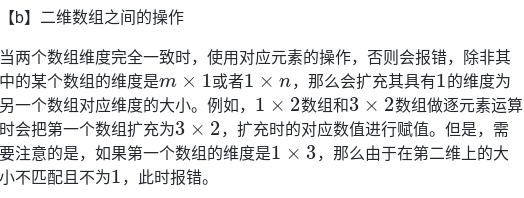

In [31]:
res = np.ones((3,2))
print(res, '\n')
print(res * np.array([[2,3]]), '\n') # 第二个数组扩充第一维度为3
res * np.array([[2],[3],[4]]) # 第二个数组扩充第二维度为2

[[1. 1.]
 [1. 1.]
 [1. 1.]] 

[[2. 3.]
 [2. 3.]
 [2. 3.]] 



array([[2., 2.],
       [3., 3.],
       [4., 4.]])

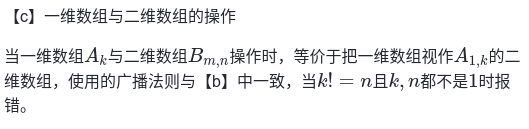

In [37]:
print(np.ones(3) + np.ones((2,3)))
print(np.ones(3) + np.ones((2,1)))

[[2. 2. 2.]
 [2. 2. 2.]]
[[2. 2. 2.]
 [2. 2. 2.]]


### 6. 向量与矩阵的计算
【a】向量内积：dot
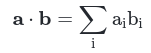

In [38]:
a = np.array([1,2,3])
b = np.array([1,3,5])
a.dot(b)

22

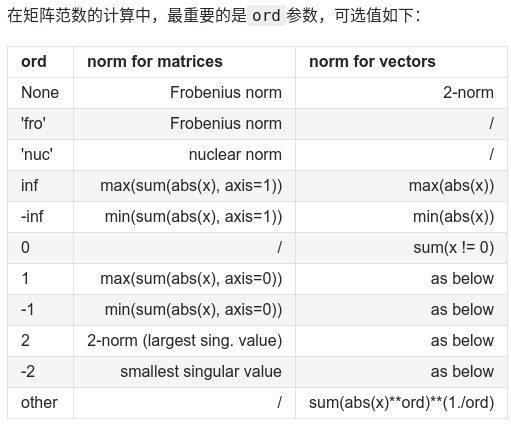

In [39]:
matrix_target =  np.arange(4).reshape(-1,2)

In [40]:
np.linalg.norm(matrix_target, 'fro')

3.7416573867739413

In [41]:
np.linalg.norm(matrix_target, np.inf)

5.0

In [42]:
np.linalg.norm(matrix_target, 2)

3.702459173643833

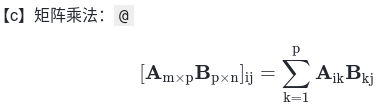

In [46]:
a = np.arange(4).reshape(-1,2)
b = np.arange(-4,0).reshape(-1,2)
print(a,'\n', b)

[[0 1]
 [2 3]] 
 [[-4 -3]
 [-2 -1]]


In [47]:
a@b

array([[ -2,  -1],
       [-14,  -9]])